# Bank Churners Data Cleaning and Exploration

## 1. Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_bank = pd.read_csv('BankChurners.csv')

## 2. Initial Data Exploration

In [2]:
# 1. Display the first 5 rows
print("First 5 rows:")
print(df_bank.head())

First 5 rows:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914

In [3]:
# 2. Display the last 5 rows
print("Last 5 rows:")
print(df_bank.tail())

Last 5 rows:
       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
10122              40  ...        4003

In [4]:
# 3. Get a summary of the dataframe
print("Dataframe Info:")
print(df_bank.info())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                           

In [5]:
# 4. Get descriptive statistics
print("Descriptive Statistics:")
print(df_bank.describe())

Descriptive Statistics:
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.0

In [6]:
# 5. Check the dimensions of the dataframe
print("Dataframe Shape:")
print(df_bank.shape)

Dataframe Shape:
(10127, 23)


## 3. Handling Missing Data

In [11]:
# 6. Check for missing values in each column
print("Missing Values per Column:")
print(df_bank.isnull().sum())

Missing Values per Column:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


## 4. Data Cleaning and Transformation

In [12]:
# 7. Drop unnecessary columns
df_bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

KeyError: "['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'] not found in axis"

In [ ]:
# 8. Convert CLIENTNUM to string
df_bank['CLIENTNUM'] = df_bank['CLIENTNUM'].astype(str)

In [ ]:
# 9. Map Attrition_Flag to numerical values
df_bank['Attrition_Flag'] = df_bank['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [ ]:
# 10. One-hot encode Gender
df_bank = pd.get_dummies(df_bank, columns=['Gender'], drop_first=True)

In [ ]:
# 11. Handle 'Unknown' in Education_Level
df_bank['Education_Level'].replace('Unknown', 'Uneducated', inplace=True)

/var/folders/r_/20_6sxq14jg1m08plp8zgwpm0000gn/T/ipykernel_34739/2836742341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Education_Level'].replace('Unknown', 'Uneducated', inplace=True)


In [ ]:
# 12. Ordinal encode Education_Level
education_map = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}
df_bank['Education_Level'] = df_bank['Education_Level'].map(education_map)

In [13]:
# 13. Handle 'Unknown' in Marital_Status
df_bank['Marital_Status'].replace('Unknown', 'Single', inplace=True)

/var/folders/r_/20_6sxq14jg1m08plp8zgwpm0000gn/T/ipykernel_36664/4075338920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Marital_Status'].replace('Unknown', 'Single', inplace=True)


In [14]:
# 14. One-hot encode Marital_Status
df_bank = pd.get_dummies(df_bank, columns=['Marital_Status'], drop_first=True)

In [15]:
# 15. Handle 'Unknown' in Income_Category
df_bank['Income_Category'].replace('Unknown', 'Less than $40K', inplace=True)

/var/folders/r_/20_6sxq14jg1m08plp8zgwpm0000gn/T/ipykernel_36664/3929286449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Income_Category'].replace('Unknown', 'Less than $40K', inplace=True)


In [16]:
# 16. Ordinal encode Income_Category
income_map = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
df_bank['Income_Category'] = df_bank['Income_Category'].map(income_map)

In [17]:
# 17. One-hot encode Card_Category
df_bank = pd.get_dummies(df_bank, columns=['Card_Category'], drop_first=True)

## 5. Handling Outliers

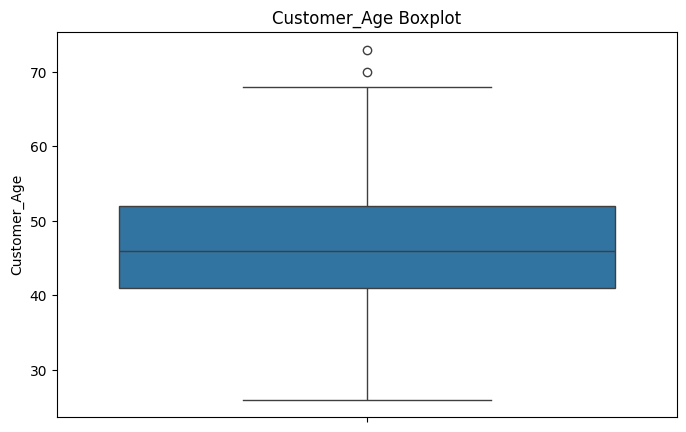

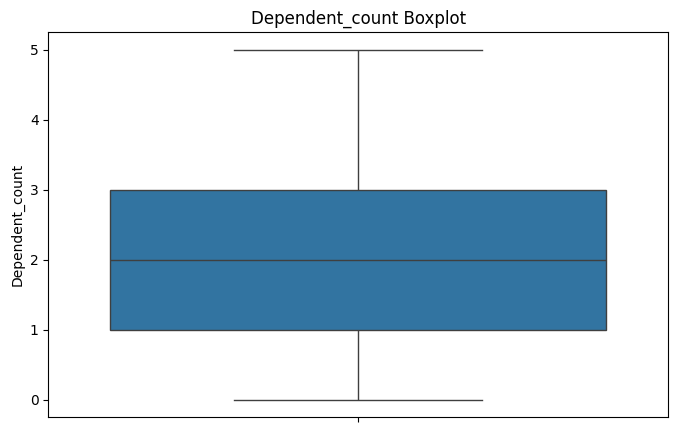

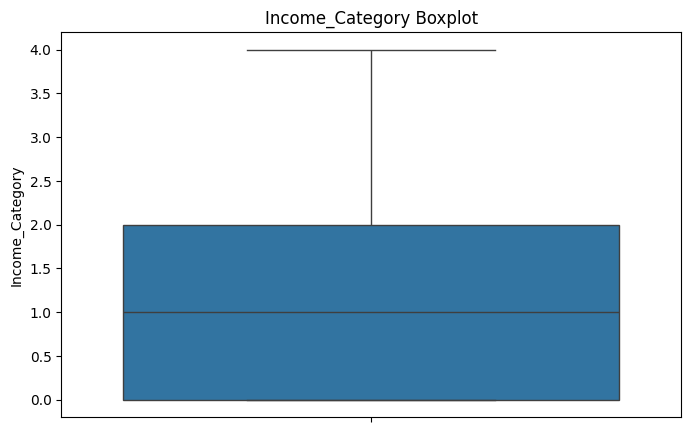

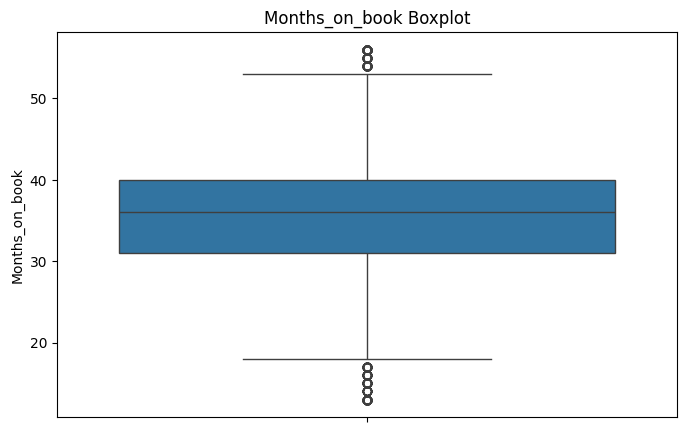

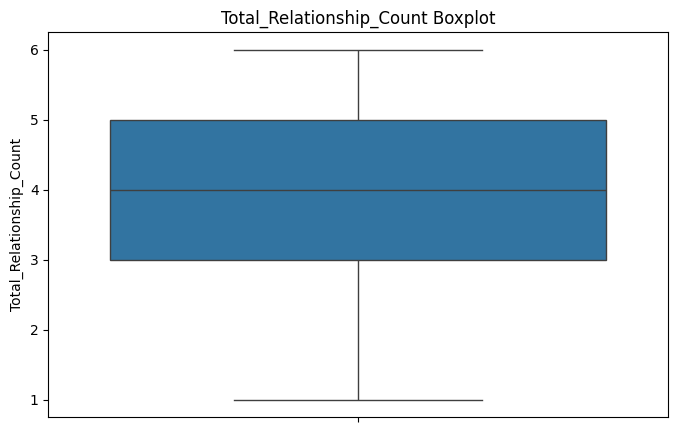

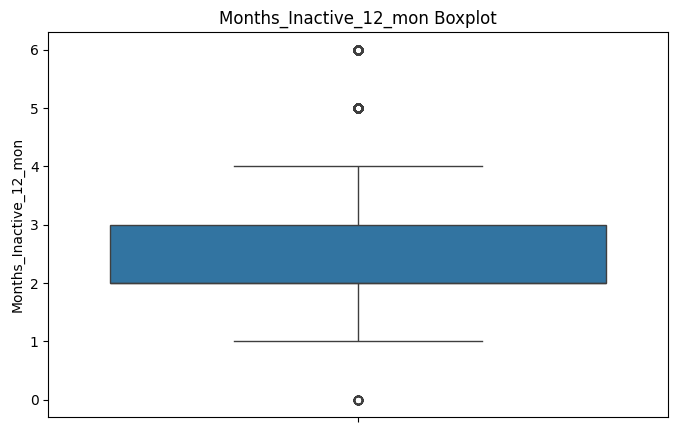

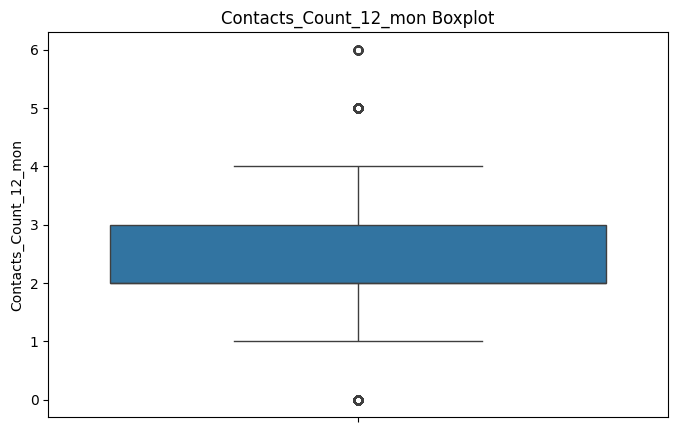

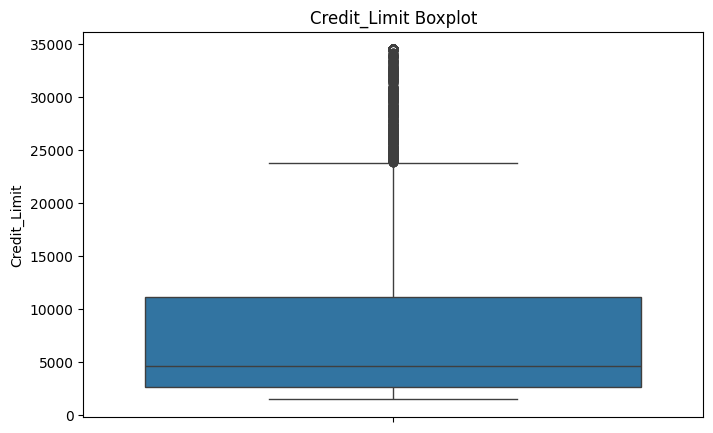

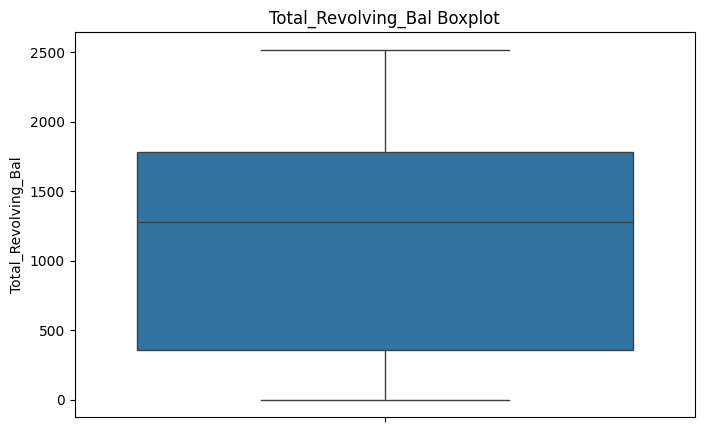

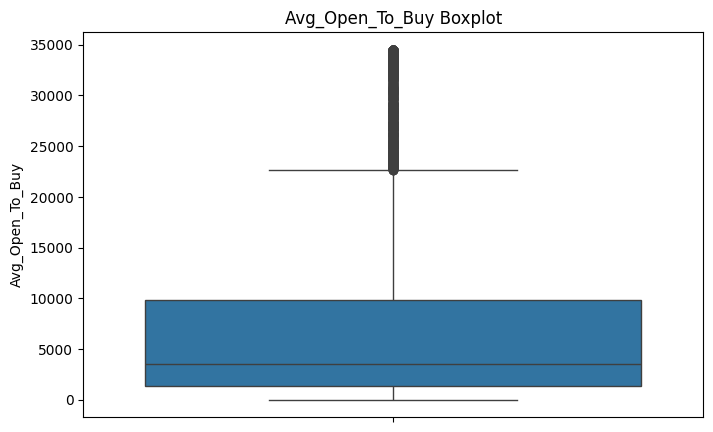

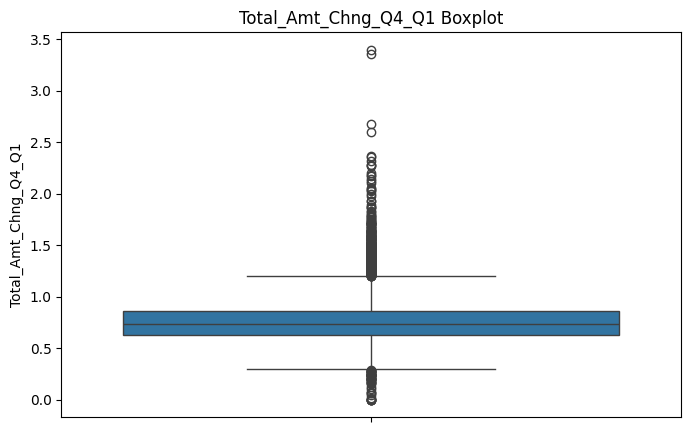

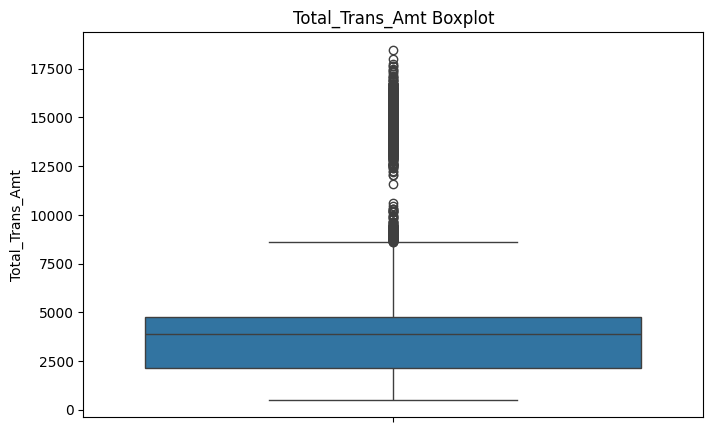

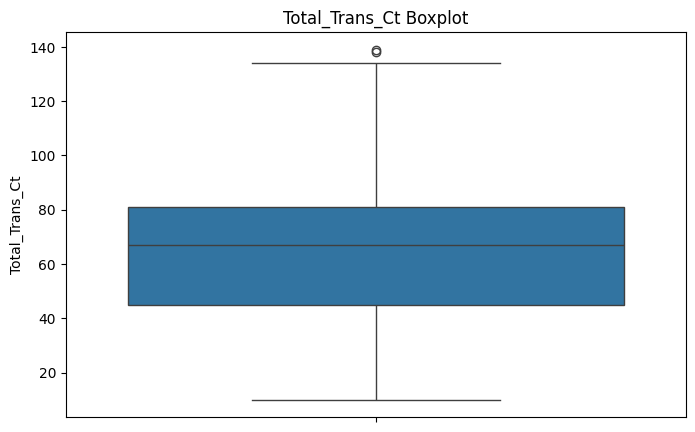

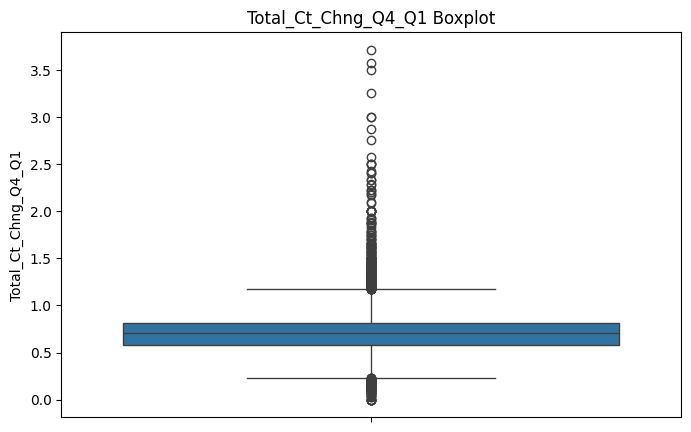

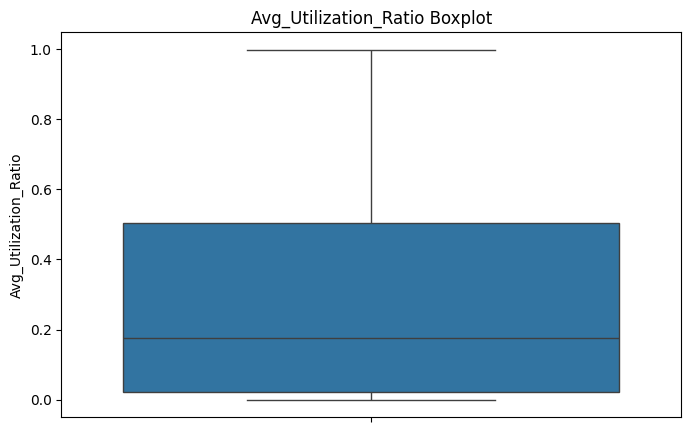

In [18]:
# 18. Visualize distributions of numerical columns
numerical_cols = df_bank.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_bank[col])
    plt.title(f'{col} Boxplot')
    plt.show()

In [19]:
# 19. Remove outliers using the IQR method for Credit_Limit
Q1 = df_bank['Credit_Limit'].quantile(0.25)
Q3 = df_bank['Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
df_bank = df_bank[~((df_bank['Credit_Limit'] < (Q1 - 1.5 * IQR)) | (df_bank['Credit_Limit'] > (Q3 + 1.5 * IQR)))]

In [20]:
# 20. Remove outliers using the IQR method for Total_Revolving_Bal
Q1 = df_bank['Total_Revolving_Bal'].quantile(0.25)
Q3 = df_bank['Total_Revolving_Bal'].quantile(0.75)
IQR = Q3 - Q1
df_bank = df_bank[~((df_bank['Total_Revolving_Bal'] < (Q1 - 1.5 * IQR)) | (df_bank['Total_Revolving_Bal'] > (Q3 + 1.5 * IQR)))]

## 6. Feature Engineering

In [21]:
# 21. Create a feature for credit utilization
df_bank['Credit_Utilization'] = df_bank['Total_Revolving_Bal'] / df_bank['Credit_Limit']

In [22]:
# 22. Create a feature for average transaction amount
df_bank['Avg_Trans_Amt'] = df_bank['Total_Trans_Amt'] / df_bank['Total_Trans_Ct']

In [23]:
# 23. Create a feature for the ratio of transactions to months on book
df_bank['Trans_per_Month'] = df_bank['Total_Trans_Ct'] / df_bank['Months_on_book']

In [24]:
# 24. Create a feature for the ratio of contacts to months on book
df_bank['Contacts_per_Month'] = df_bank['Contacts_Count_12_mon'] / df_bank['Months_on_book']

In [25]:
# 25. Create a feature for the ratio of inactive months to months on book
df_bank['Inactive_Ratio'] = df_bank['Months_Inactive_12_mon'] / df_bank['Months_on_book']

## 7. Final Exploration

In [26]:
# 26. Show the cleaned data's first 5 rows
print("Cleaned Data Head:")
print(df_bank.head())

Cleaned Data Head:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level  Income_Category  Months_on_book  Total_Relationship_Count  \
0     High School                2              39                         5   
1        Graduate                0              44                         6   
2        Graduate                3              36                         4   
3     High School                0              34                         3   
4      Uneducated                2              21                         5   

   Months_Inactive_12_mon  ...  Marital_Status_Married  Marit

In [27]:
# 27. Show the cleaned data's info
print("Cleaned Data Info:")
print(df_bank.info())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9143 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 9143 non-null   object 
 1   Attrition_Flag            9143 non-null   object 
 2   Customer_Age              9143 non-null   int64  
 3   Gender                    9143 non-null   object 
 4   Dependent_count           9143 non-null   int64  
 5   Education_Level           9143 non-null   object 
 6   Income_Category           9143 non-null   int64  
 7   Months_on_book            9143 non-null   int64  
 8   Total_Relationship_Count  9143 non-null   int64  
 9   Months_Inactive_12_mon    9143 non-null   int64  
 10  Contacts_Count_12_mon     9143 non-null   int64  
 11  Credit_Limit              9143 non-null   float64
 12  Total_Revolving_Bal       9143 non-null   int64  
 13  Avg_Open_To_Buy           9143 non-null   float6

In [28]:
# 28. Show the cleaned data's description
print("Cleaned Data Description:")
print(df_bank.describe())

Cleaned Data Description:
       Customer_Age  Dependent_count  Income_Category  Months_on_book  \
count   9143.000000      9143.000000      9143.000000     9143.000000   
mean      46.320464         2.320354         1.019578       35.922017   
std        8.144741         1.301963         1.239680        8.105905   
min       26.000000         0.000000         0.000000       13.000000   
25%       41.000000         1.000000         0.000000       31.000000   
50%       46.000000         2.000000         1.000000       36.000000   
75%       52.000000         3.000000         2.000000       40.000000   
max       73.000000         5.000000         4.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               9143.000000             9143.000000   
mean                   3.847206                2.344526   
std                    1.540298                1.015346   
min                    1.000000                0.000000   
25%                  

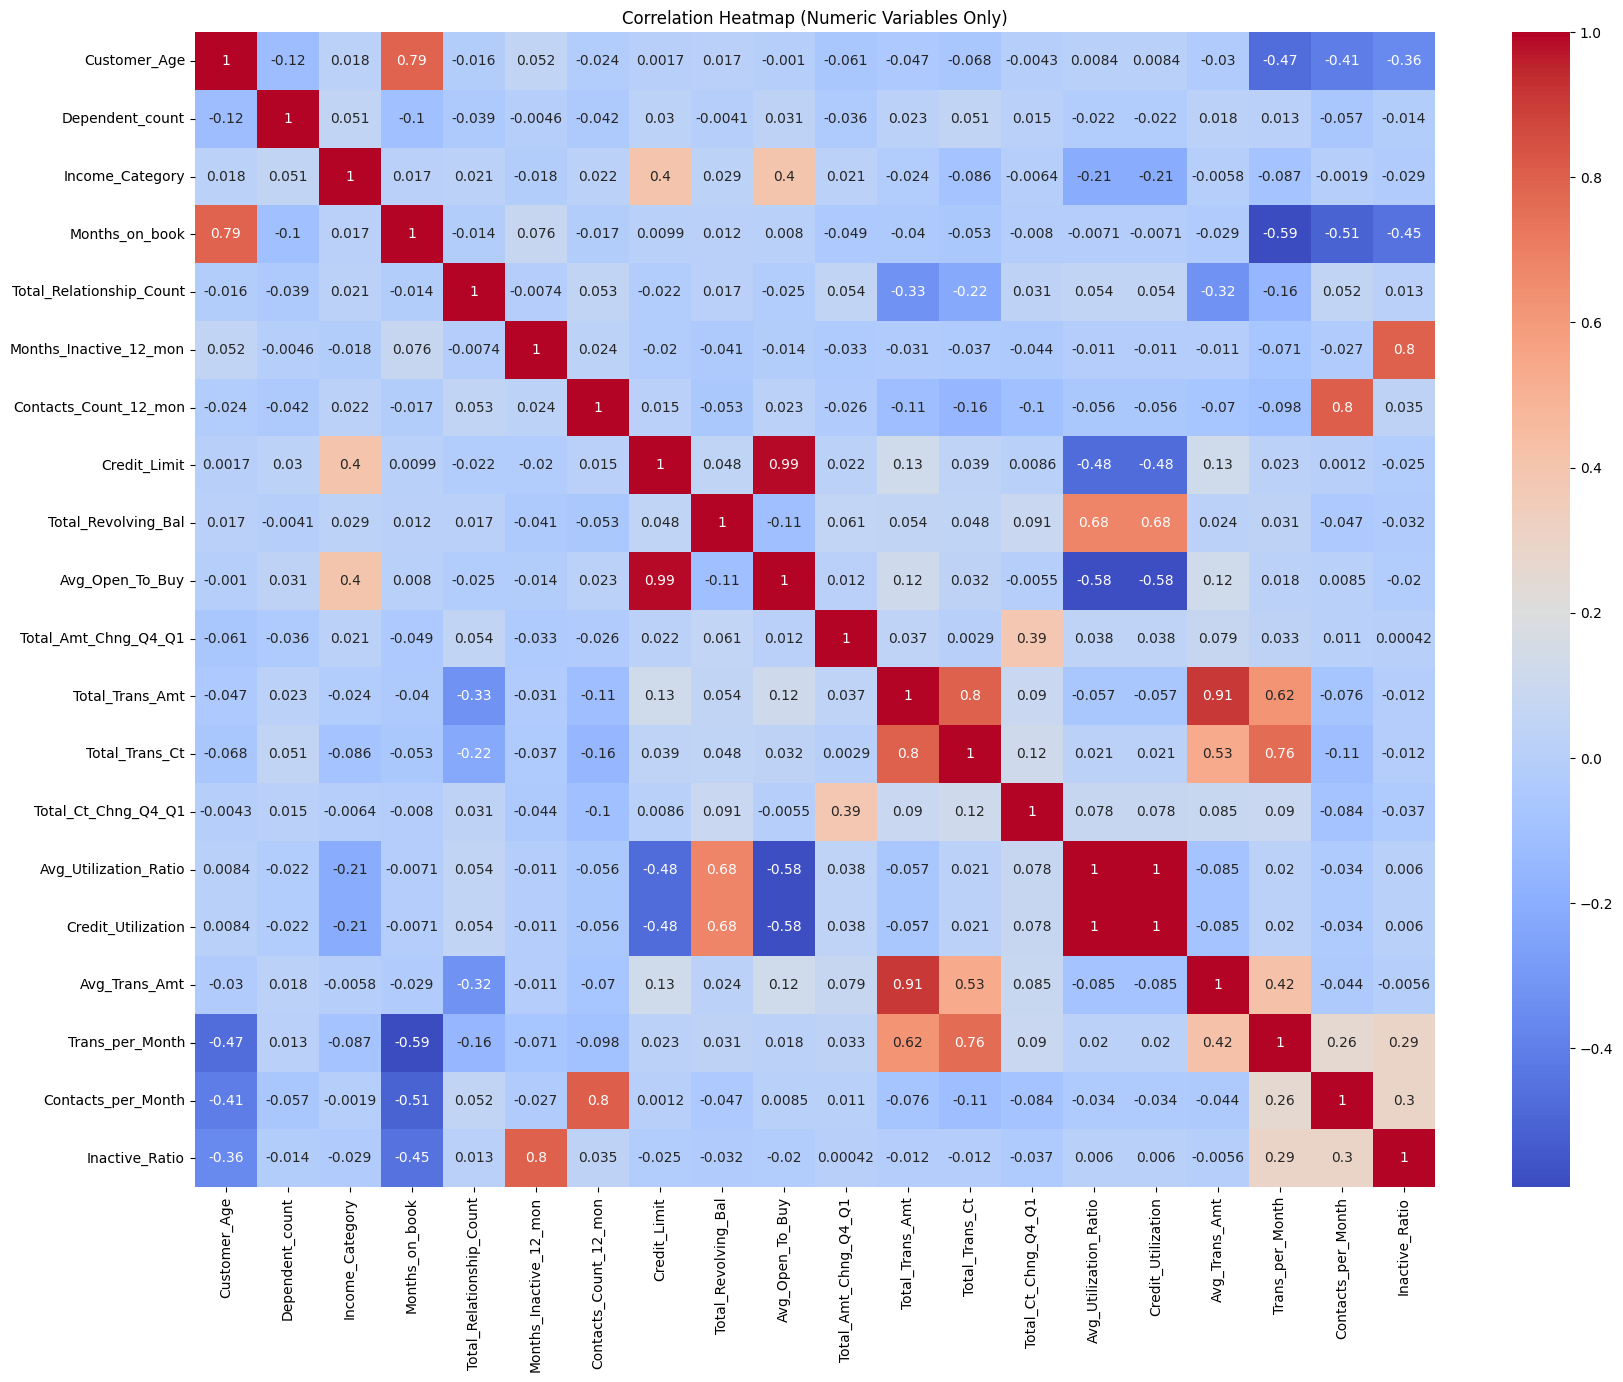

In [ ]:
# 29. Correlation heatmap
plt.figure(figsize=(20, 15))
# Select only numeric columns for correlation
numeric_df = df_bank.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Variables Only)')
plt.show()

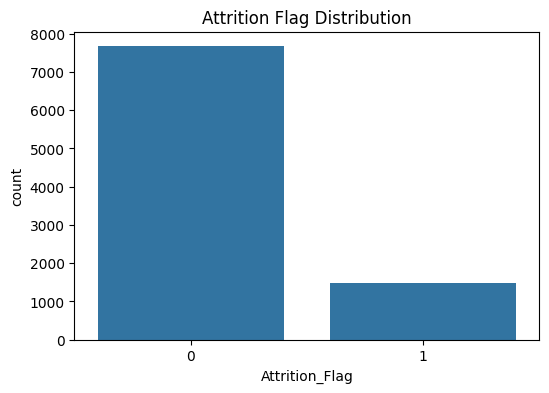

In [ ]:
# 30. Attrition flag distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df_bank)
plt.title('Attrition Flag Distribution')
plt.show()